In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Create a DataFrame from the iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris.target

# Print the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris_df.drop('target', axis =1)
y = iris_df[['target']]
feature_names = iris.feature_names
class_names = iris.target_names

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=4)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=4)

In [5]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from IPython.display import Image

In [6]:
# Export the decision tree as a dot file
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

In [7]:
# Create a graph from the dot data
graph = graphviz.Source(dot_data)

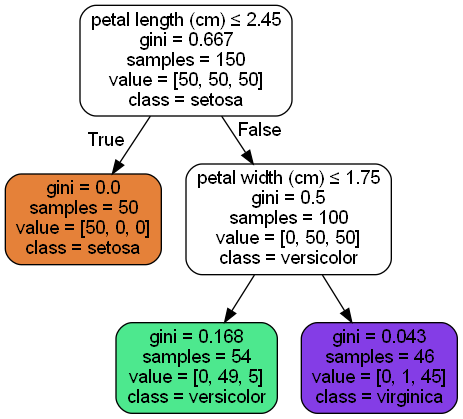

In [8]:
# Save the decision tree as an image file
graph.format = 'png'
graph.render('decision_tree')

# Display the decision tree image
Image('decision_tree.png')

In [12]:
tree_clf.predict_proba(X.iloc[[55]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict(X.iloc[[55]])

array([1])

## Regression Decision Tree

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Text(0.5, 1.0, 'max_depth=3')

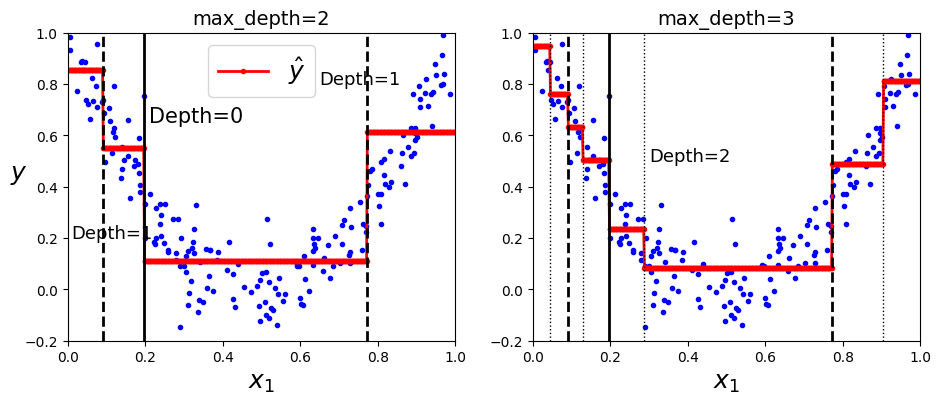

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


In [19]:
export_graphviz(
        tree_reg1,
        out_file=None,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x1 <= 0.197\\nsquared_error = 0.098\\nsamples = 200\\nvalue = 0.354", fillcolor="#f6d6be"] ;\n1 [label="x1 <= 0.092\\nsquared_error = 0.038\\nsamples = 44\\nvalue = 0.689", fillcolor="#eb9d65"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="squared_error = 0.018\\nsamples = 20\\nvalue = 0.854", fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label="squared_error = 0.013\\nsamples = 24\\nvalue = 0.552", fillcolor="#f0b489"] ;\n1 -> 3 ;\n4 [label="x1 <= 0.772\\nsquared_error = 0.074\\nsamples = 156\\nvalue = 0.259", fillcolor="#fae6d7"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="squared_error = 0.015\\nsamples = 110\\nvalue = 0.111", fillcolor="#ffffff"] ;\n4 -> 5 ;\n6 [label="squared_error = 0.036\\nsamples = 46\\nvalue = 0.615", fillcolor="#edaa79"] ;\n4 -> 6 ;\n}'

Text(0.5, 1.0, 'min_samples_leaf=10')

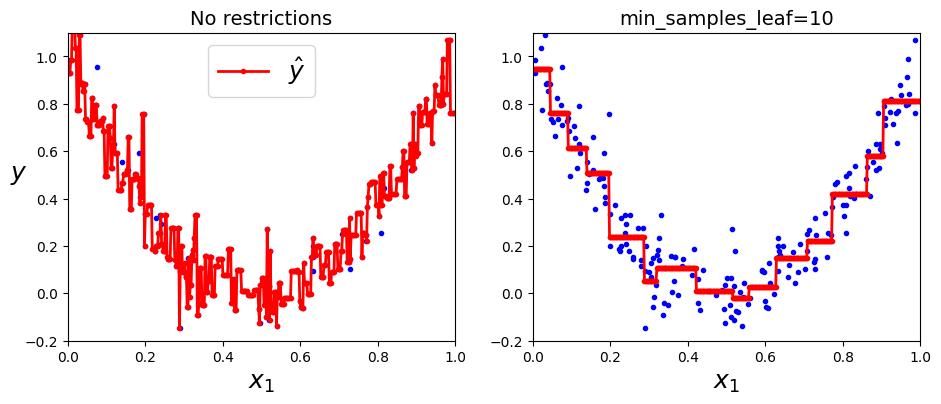

In [20]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


### Train and fine-tune a Decision Tree for the moons dataset

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

- **n_jobs:** This parameter controls the number of jobs to run in parallel for fitting the models and performing cross-validation. By setting n_jobs to an integer value greater than 1 (e.g., n_jobs=-1), it allows the grid search to utilize multiple CPU cores, enabling faster execution when dealing with a large number of models or a large dataset. A value of -1 typically indicates using all available CPU cores, but you can also specify a specific number.

- **verbose:** This parameter controls the verbosity of the output during the grid search process. By setting verbose to a non-zero value, it provides additional information and progress updates about the grid search. The higher the value, the more detailed the output. For example, verbose=1 displays a progress bar, while verbose=2 provides detailed logging for each model fit.

In [24]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

### Growing a Forest

- Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [26]:
len(X_train)

8000

In [27]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

In [28]:
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [31]:
X_mini_train.shape

(100, 2)

In [33]:
len(mini_sets)

1000

In [34]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.805471

- Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [35]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [36]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [42]:
y_pred_majority_votes

array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
n_votes

array([[951, 912, 963, ..., 919, 994, 603]])

- Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [39]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872